In [32]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
data = pd.read_csv('dataset.tsv', sep="\t", header= None)
data.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "y"]

In [58]:
data.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,58,management,married,고학력,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,중학력,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no


In [59]:
data.columns

Index([u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9', u'x10',
       u'x11', u'x12', u'x13', u'x14', u'x15', u'y'],
      dtype='object')

In [60]:
data.describe()

,x1,x6,x10,x12,x13,x14
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,41.068150,1517.338050,15.749375,2.751550,40.739850,0.594400
std,10.745571,3150.922909,8.296992,3.070856,100.295911,2.347014
min,18.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,146.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,543.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1595.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [20]:
corr=data.corr()["x1"]
corr[np.argsort(corr, axis=0)[::-1]]

x1     1.000000
x6     0.097186
x12    0.002675
x14    0.001700
x10   -0.009893
x13   -0.025105
Name: x1, dtype: float64

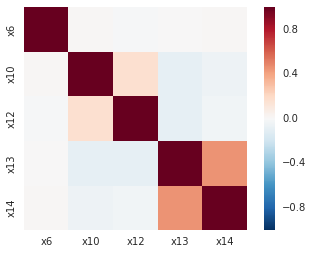

In [27]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(corr, vmax=1, square=True)

no     35099
yes     4901
Name: y, dtype: int64


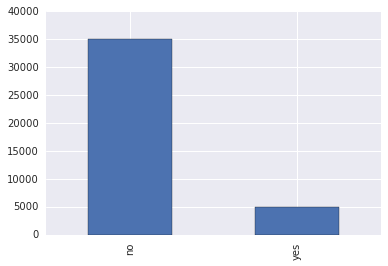

In [29]:
target = data['y'].copy()
target.value_counts().plot(kind = 'bar')
print target.value_counts()

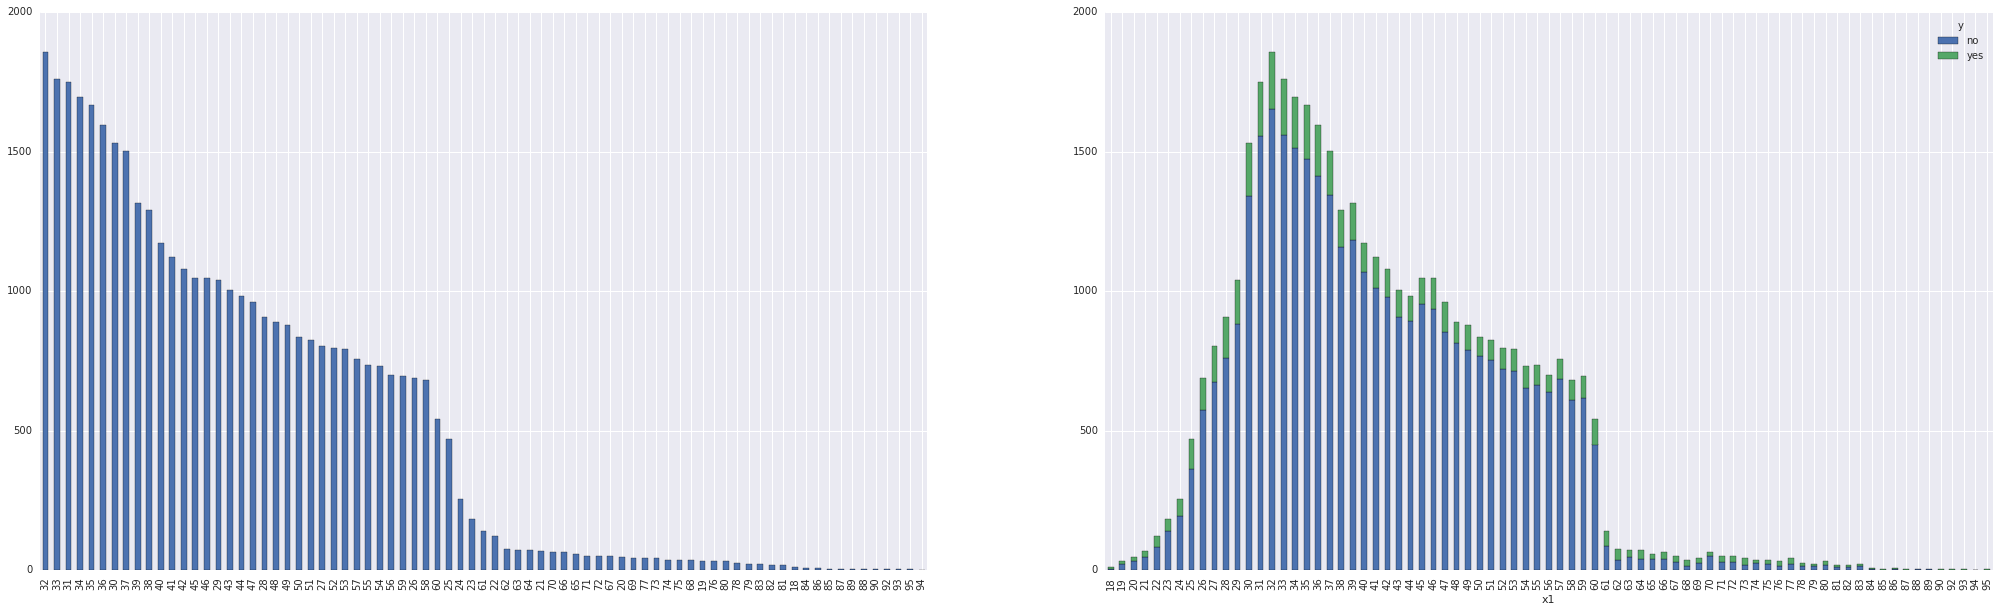

In [45]:
P_S = pd.concat([data['x1'], target], axis = 1)
df_P_LorD = pd.crosstab(data['x1'], target)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(35,10))

# x1의 분포 그래프
data['x1'].value_counts().plot(kind = 'bar', ax = ax1)

# Pclass당 생존자와 사망자의 비중 :
df_P_LorD.plot(kind= 'bar', stacked = True, ax = ax2)
plt.show()

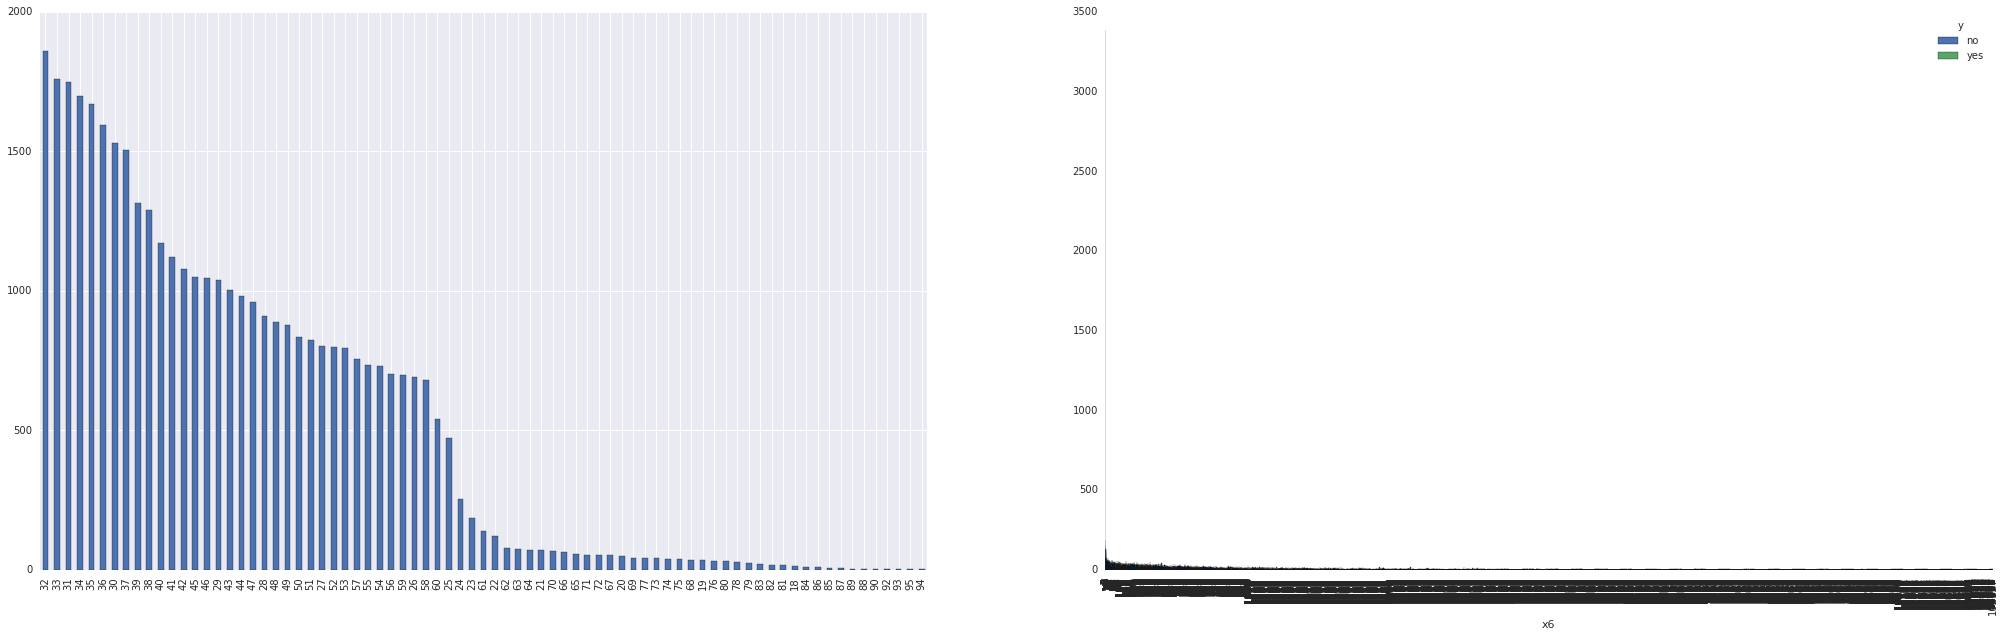

In [56]:
P_S = pd.concat([data['x6'], target], axis = 1)
df_P_LorD = pd.crosstab(data['x6'], target)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(35,10))

# x1의 분포 그래프
data['x1'].value_counts().plot(kind = 'bar', ax = ax1)

# Pclass당 생존자와 사망자의 비중 :
df_P_LorD.plot(kind= 'bar', stacked = True, ax = ax2)
plt.show()

In [62]:
data['y'].ix[(data['y'] == 'no')] = 0
data['y'].ix[(data['y'] == 'yes')] = 1

/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
data = pd.concat([data, pd.get_dummies(data['x4'])], axis= 1)

In [63]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,58,management,married,고학력,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,중학력,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,중학력,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0
5,35,management,married,고학력,no,231,yes,no,unknown,5,may,1,-1,0,unknown,0
6,28,management,single,고학력,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,0
7,42,entrepreneur,divorced,고학력,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,0
8,58,retired,married,저학력,no,121,yes,no,unknown,5,may,1,-1,0,unknown,0
9,43,technician,single,중학력,no,593,yes,no,unknown,5,may,1,-1,0,unknown,0
